In [ ]:
#Question 2.) Use CC_GENERAL.csv given in the folder and apply:
#a) Preprocess the data by removing the categorical column and filling the missing values.
#b) Apply StandardScaler() and normalize() functions to scale and normalize raw input data.
#c) Use PCA with K=2 to reduce the input dimensions to two features.
#d) Apply Agglomerative Clustering with k=2,3,4 and 5 on reduced features and visualize result for each k value using scatter plot.
#e) Evaluate different variations using Silhouette Scores and Visualize results with a bar chart.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import collections
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import metrics, preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns

import scipy.cluster.hierarchy as shc
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("CC GENERAL.csv")
print(data.shape)
data.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [5]:
#a)
data.fillna(data.mean(), inplace=True)
data.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [7]:
x = data.drop('CUST_ID', axis = 1)
print(x)

          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.9

In [8]:
#b)
#feature Scaling 
scaler = StandardScaler()
scaler.fit(x)
X_scaled_array = scaler.transform(x)

In [10]:
#Normalize the given data
X_normalized = normalize(X_scaled_array)
X_normalized = pd.DataFrame(X_normalized)

In [11]:
#c)
#reducting the dimensionality of the Data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
principalDf =  pd.DataFrame(data = X_principal, columns = ['principal component1', 'principal component2'])
finalDf = pd.concat([principalDf, data[['TENURE']]], axis = 1)
finalDf.head()

,principal component1,principal component2,TENURE
0,-0.489825,-0.679678,12
1,-0.518791,0.545012,12
2,0.330885,0.268976,12
3,-0.482373,-0.092110,12
4,-0.563289,-0.481915,12


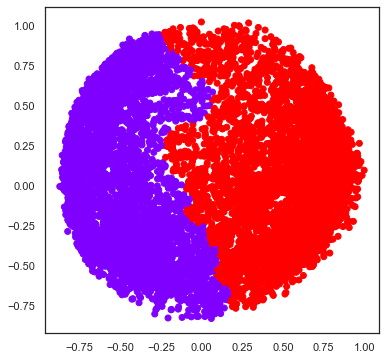

In [13]:
#d)
# Visualizing the clustering k = 2
k1 = AgglomerativeClustering(n_clusters = 2) 
plt.figure(figsize =(6, 6))
plt.scatter(principalDf['principal component1'], principalDf['principal component2'],
           c = k1.fit_predict(principalDf), cmap ='rainbow')
plt.show()

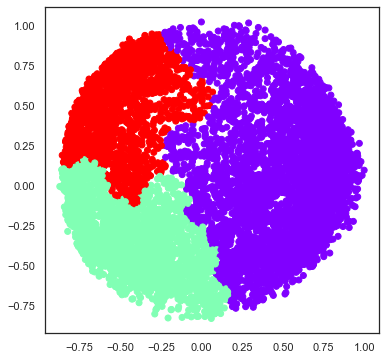

In [14]:
# Visualizing the clustering k = 3
k2 = AgglomerativeClustering(n_clusters = 3)
plt.figure(figsize =(6, 6))
plt.scatter(principalDf['principal component1'], principalDf['principal component2'],
           c = k2.fit_predict(principalDf), cmap ='rainbow')
plt.show()

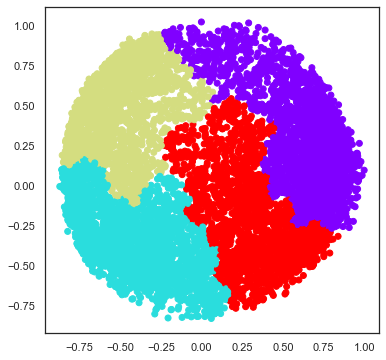

In [15]:
# Visualizing the clustering k = 4
k3 = AgglomerativeClustering(n_clusters = 4)
plt.figure(figsize =(6, 6))
plt.scatter(principalDf['principal component1'], principalDf['principal component2'],
           c = k3.fit_predict(principalDf), cmap ='rainbow')
plt.show()

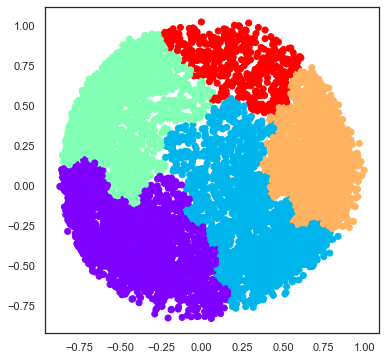

In [16]:
# Visualizing the clustering k = 5
k4 = AgglomerativeClustering(n_clusters = 5)
plt.figure(figsize =(6, 6))
plt.scatter(principalDf['principal component1'], principalDf['principal component2'],
           c = k4.fit_predict(principalDf), cmap ='rainbow')
plt.show()

In [17]:
#e) 
#Silhouette Score
silhouette_scores = [] 
for n_cluster in range(2, 6):
    silhouette_scores.append(   
        silhouette_score(X_principal, KMeans(n_clusters = n_cluster).fit_predict(X_principal))) 
 

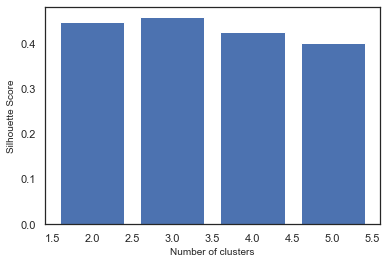

In [18]:
#visualizing feature value of k
k = [2, 3, 4, 5] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 